<a href="https://colab.research.google.com/github/Lokeshkalli/Yulu-s-Business_Case-Study/blob/main/Yulu_Hypothesis_Testing_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
**From Yulu's Perspective:**

● Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.

● Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.

**From Learners' Perspective:**

● Real-World Problem-Solving: It presents an opportunity to apply machine learning and data analysis techniques to address a real-world business problem.

● Market Insights: Analyzing factors affecting demand in the Indian market equips learners with market research skills. This knowledge is transferable to various industries.

● Consulting Skills: Learners can develop their ability to act as consultants, providing data-driven insights to organizations.

**Column Profiling:**

- **datetime**: datetime
- **season** : season (1: spring, 2: summer, 3: fall, 4: winter)
- **holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is
**0.weather**:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **humidity**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **count**: count of total rental bikes including both casual and registered

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
import statsmodels.api as sm



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Business case datasets/bike_sharing.csv')
df = data.copy()

In [ ]:
df.shape

(10886, 12)

# 1 Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.
a. Examine dataset structure, characteristics, and statistical summary.

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.season.unique()

array([1, 2, 3, 4])

In [ ]:
df.holiday.unique()

array([0, 1])

In [ ]:
df.workingday.unique()

array([0, 1])

In [ ]:
# df[cat_var]['season'].value_counts(),df[cat_var]['season'].value_counts().index

**b. Identify missing values and perform Imputation using an appropriate method.**

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no null values

**c. Identify and remove duplicate records.**

In [ ]:
df.duplicated().sum()

0

**d. Analyze the distribution of Numerical & Categorical variables, separately**

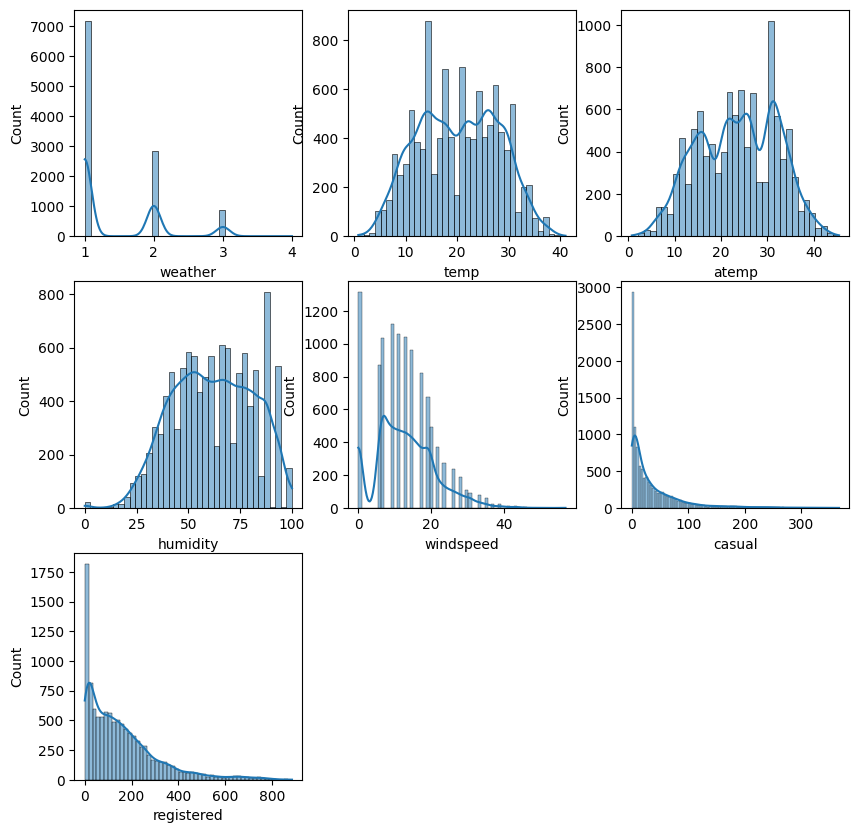

In [ ]:
numericals_feature = ['weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(10,10))

for i in range(1,len(numericals_feature)):
  plt.subplot(3,3,i)
  sns.histplot(df[numericals_feature[i-1]],kde=True)

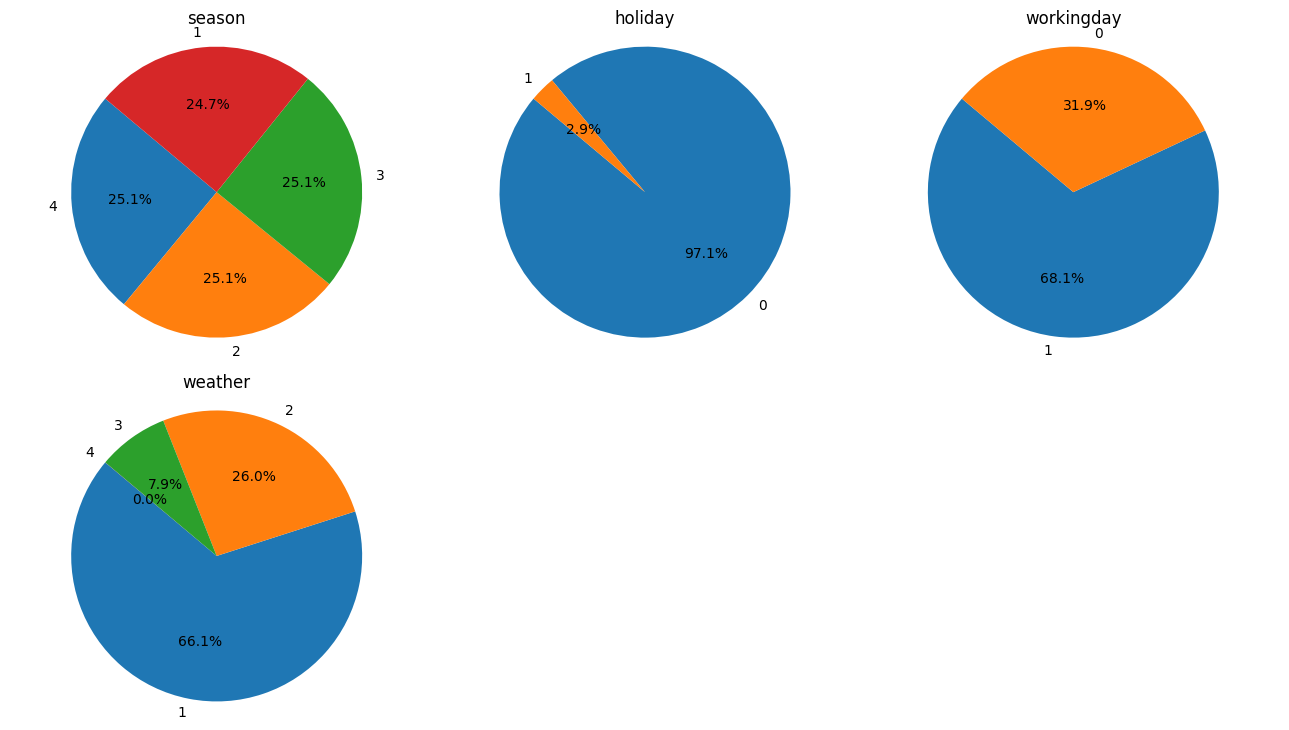

In [ ]:
cat_var=['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(13, 11))

for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1, aspect='equal')
    plt.pie(df[cat_var[i]].value_counts(), labels=df[cat_var[i]].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(cat_var[i])
    plt.axis('equal')

plt.tight_layout()
plt.show()

# e. Check for Outliers and deal with them accordingly.

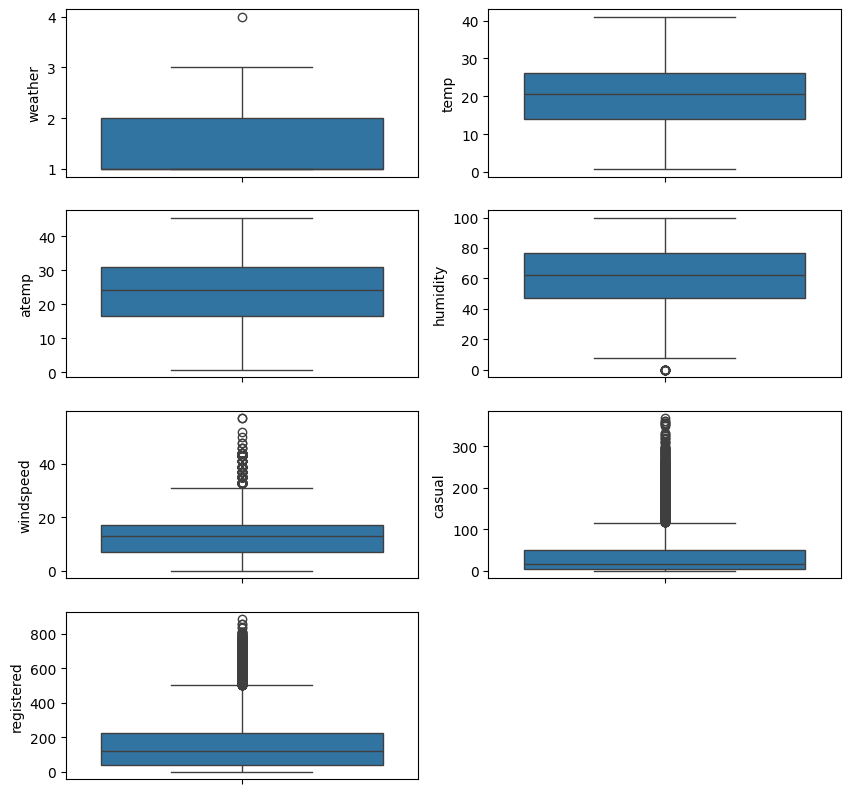

In [ ]:
numericals_feature = ['weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(10,10))

for i in range(1,len(numericals_feature)):
  plt.subplot(4,2,i)
  sns.boxplot(df[numericals_feature[i-1]])


## Insights:

- There are totally 10886 rows and 12 columns in the data

- The data does not contain any nulls, thus no need of handling the missing data.

- Outliers are observed in windspeed and bike rental counts (casual, registered, and total).



**Clipping**

In [ ]:
num_feat =['windspeed', 'casual', 'registered', 'count']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

# 2. Try establishing a Relationship between the Dependent and Independent Variables.

In [ ]:
corr_df = df[numericals_feature].corr()
corr_df

,weather,temp,atemp,humidity,windspeed,casual,registered,count
weather,1.000000,-0.055035,-0.055376,0.406244,0.003731,-0.147311,-0.116717,-0.132163
temp,-0.055035,1.000000,0.984948,-0.064949,-0.012351,0.524380,0.333722,0.404120
atemp,-0.055376,0.984948,1.000000,-0.043536,-0.051960,0.517896,0.329985,0.399762
humidity,0.406244,-0.064949,-0.043536,1.000000,-0.319166,-0.371090,-0.287171,-0.328046
windspeed,0.003731,-0.012351,-0.051960,-0.319166,1.000000,0.109439,0.107767,0.114694
casual,-0.147311,0.524380,0.517896,-0.371090,0.109439,1.000000,0.589091,0.744431
registered,-0.116717,0.333722,0.329985,-0.287171,0.107767,0.589091,1.000000,0.973646
count,-0.132163,0.404120,0.399762,-0.328046,0.114694,0.744431,0.973646,1.000000


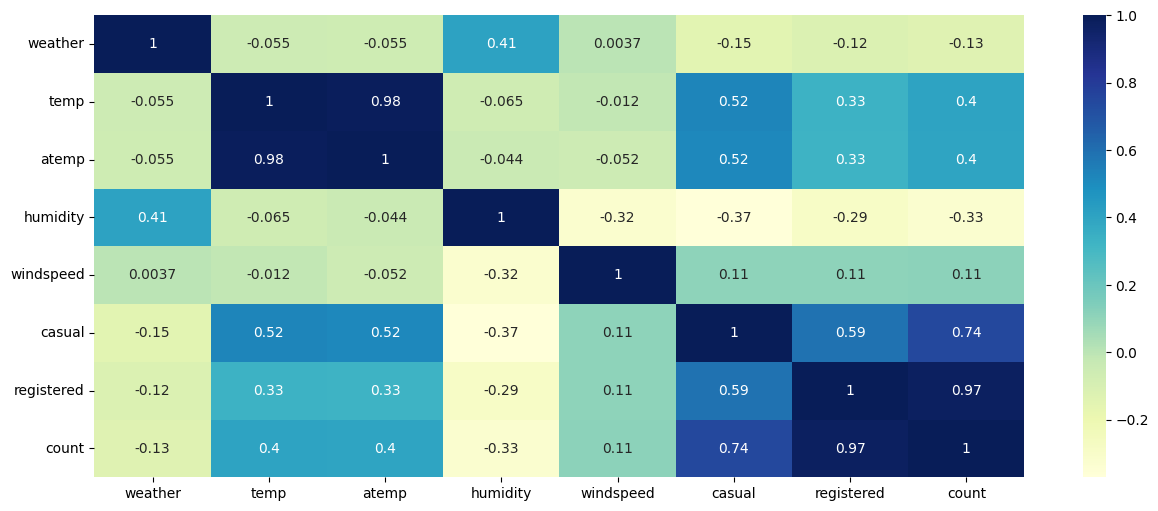

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
plt.show()

**Insights:**
**Atemp:**

- Strong positive correlation with 'temp' (0.98), indicating a close relationship.
- Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

 **Temp (Temperature):**

- Highly correlated with 'atemp' (0.98), indicating a strong connection.
Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
- Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

**Humidity:**

- Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
- Indicates a tendency for fewer bike rentals during higher humidity.

**Windspeed:**

- Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
- Suggests a subtle influence on bike rentals with increasing wind speed.


**Count (Total Bike Rentals):**

- Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
Negative correlation with 'humidity' (-0.32).
Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.

# 3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

**Null Hypothesis**: Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis**: Working day has effect on the number of cycles being rented.

**Significance level (alpha)** : 0.05

We will use the **2-Sample T-Test** to test the hypothess defined above

week-day - 1

weekend - 0

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
week_ends= df[df['workingday']==0]['count'].values
week_days= df[df['workingday']==1]['count'].values

np.var(week_days), np.var(week_ends)

(26737.84858219242, 27834.248634217412)

In [ ]:
from scipy.stats import ttest_ind
t_stat, pvalue = ttest_ind(week_days, week_ends)
t_stat, pvalue

(-0.08185262080655475, 0.934765416165105)

* The variances between the two groups are equal

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('We have the sufficient evidence to say that working day has effect on the number of cycles being rented')
else:
  print ('Fail to Reject H0')
  print('We dont have the sufficient evidence to say that working day has effect on the number of cycles being rented')

Fail to Reject H0
We dont have the sufficient evidence to say that working day has effect on the number of cycles being rented


# Draw inferences & conclusions from the analysis and provide recommendations.

# 4. Check if the demand of bicycles on rent is the same for different Weather conditions?
* **a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**
* **Null Hypothesis (H0)** : There is no significant difference between demand of bicycles for different Weather conditions


* **Alternate Hypothesis (H1)** : There is a significant difference between demand of bicycles for different Weather conditions

# b. Select an appropriate test -
* If assumptions are met we will go with anova test
* else we will use Kruskal test

# c. Check assumptions of the test

QQ Plot

In [ ]:
weather_groups = df.groupby('weather')['count']

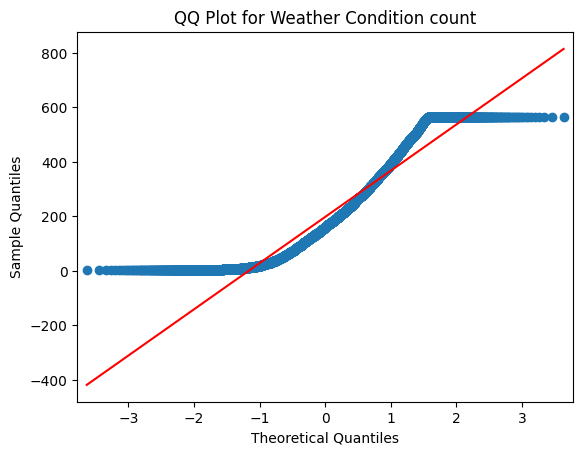

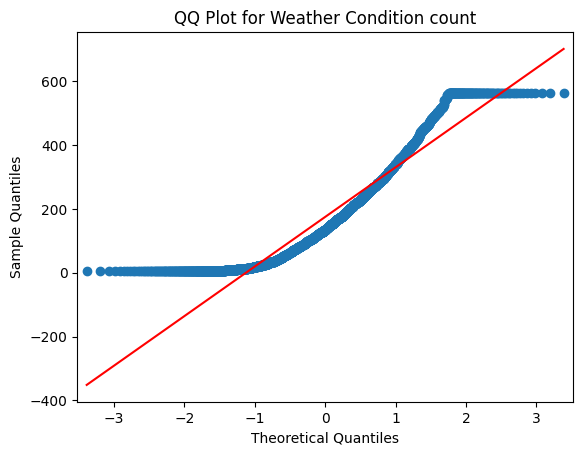

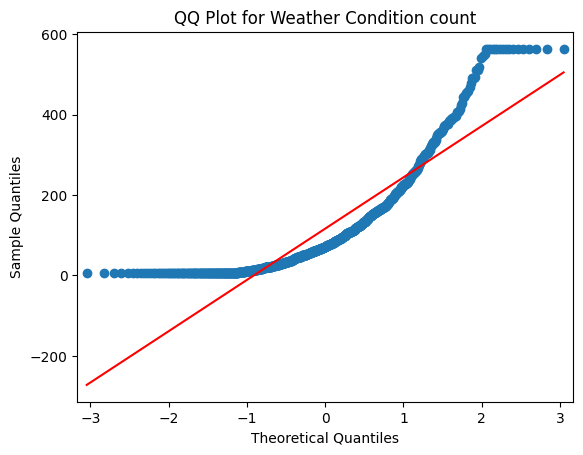

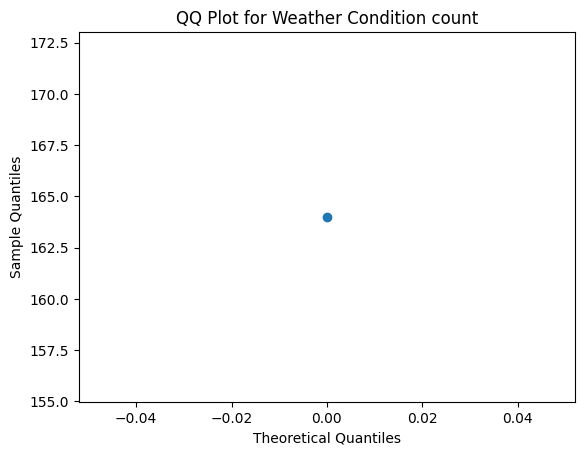

In [ ]:
for name, group in weather_groups:
  sm.qqplot(group, line='s')
  plt.title(f"QQ Plot for Weather Condition {group.name}")
  plt.show()

## Checking skewness

In [ ]:
df.groupby('weather')['count'].skew()

weather
1    0.736322
2    0.929685
3    1.701329
4         NaN
Name: count, dtype: float64

In [ ]:
df.groupby('weather')['count'].apply(lambda x: x.kurtosis())


weather
1   -0.525922
2    0.010388
3    2.648928
4         NaN
Name: count, dtype: float64

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,4,5.0


In [ ]:
df.groupby('weather')['count'].sum()

weather
1    1426079.75
2     495094.25
3     100073.75
4        164.00
Name: count, dtype: float64

Histogram

<ipython-input-31-58155011d68c>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, x = 'count', hue = 'weather')


<Axes: xlabel='count', ylabel='Density'>

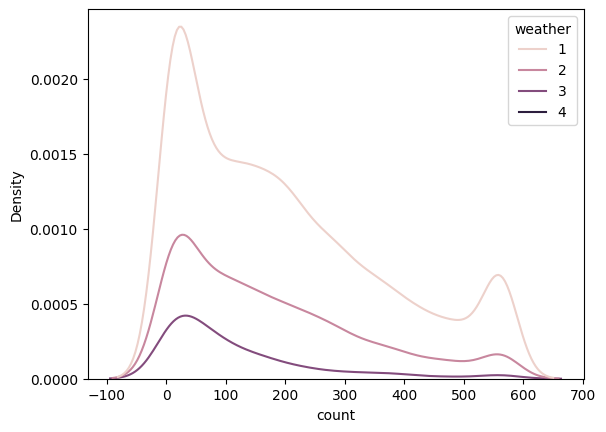

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Count'>

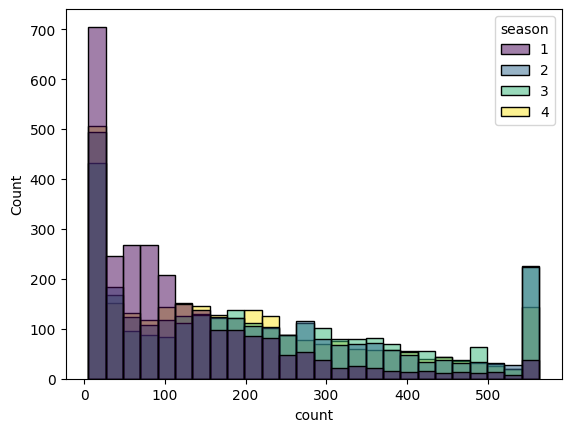

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'season',palette='viridis')


## Levene Test for varibility

**The Test hypothesis for Levene's test are:**

**Ho: The variances are equal.**

**Ha: The variances are not equal.**

In [ ]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

levene_stat, p_val = levene(weather1, weather2, weather3,weather4)

levene_stat, p_val

(63.561909332553384, 9.825185817580428e-41)

In [ ]:
if p_val < 0.05:
  print('Reject the null Hypothesis, Variances are not equal')
else:
  print('Fail to Reject the null Hypothesis, Variances are  equal')


Reject the null Hypothesis, Variances are not equal


Observation:
SInc

# As assumptions are not met we are going to use Kruskal Test Instead of Anova.
But just for reference we using anova here

## d. Set a significance level and Calculate the test Statistics / p-value.

In [ ]:
alpha = 0.05

# Anova Test

In [ ]:
anova_stat, p_val_anova = f_oneway(weather1, weather2, weather3,weather4)

p_val_anova

6.083863264395891e-45

In [ ]:
if p_val_anova < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different weather conditions')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different weather conditions')


Reject the null Hypothesis, There is a significance difference for demand of bicycles for different weather conditions


# Kruskal Test on weather

In [ ]:
kruskal_stat, p_val_of_kruskaltest = kruskal(weather1, weather2, weather3,weather4)

p_val_of_kruskaltest

3.900417263983396e-44

In [ ]:
if p_val_of_kruskaltest < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different weather conditions')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different weather conditions')



Reject the null Hypothesis, There is a significance difference for demand of bicycles for different weather conditions


## Observation
- **P- value - 3.900417263983396e-44 is less than significance. We can infer that There is a significance difference for demand of bicycles for different weather conditions**


# 5. Check if the demand of bicycles on rent is the same for different Seasons?


## a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

Null Hypothesis (H0): There is no significant difference between demand of bicycles for different seasons.

Alternate Hypothesis (H1): There is a significant difference between demand of bicycles for different seasons.

## b. Select an appropriate test -

- One-way ANOVA test

## c. Check assumptions of the test

-**Normality**

In [ ]:
df.groupby('season')['count'].skew()

season
1    1.664246
2    0.661793
3    0.495434
4    0.758983
Name: count, dtype: float64

In [ ]:
df.groupby('season')['count'].apply(lambda x: x.kurtosis())

season
1    2.767844
2   -0.665804
3   -0.854426
4   -0.373277
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Count'>

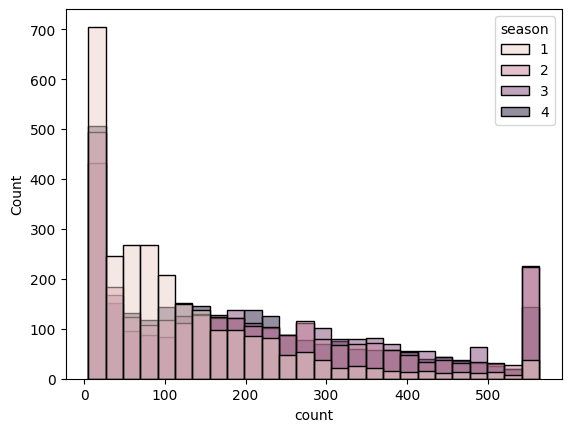

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'season')

**Levene's test**

**Ho**: The variances are equal.

**Ha**: The variances are not equa

In [ ]:
df.groupby('season')['count'].sum()

season
1    310516.50
2    568077.25
3    614005.75
4    528812.25
Name: count, dtype: float64

In [ ]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
from scipy.stats import levene

season1 = df[df['season'] == 1]['count']
season2 = df[df['season'] == 2]['count']
season3 = df[df['season'] == 3]['count']
season4 = df[df['season'] == 4]['count']

levene_stat, p_val = levene(season1, season2, season3,season4)

print(p_val)
if p_val < 0.05:
  print('p_values is smaller than the significance level, Null hypothesis can be rejected.')
else:
  print('p_values is higher than the significance level, Null hypothesis can be accepted')


3.684749131629985e-132
p_values is smaller than the significance level, Null hypothesis can be rejected.


## Anova test

In [ ]:
anova_stat, p_val = f_oneway(season1, season2, season3,season4)

p_val

if p_val < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different seasons')

Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons


## Kruskal Test

In [ ]:
kruskal_stat, p_val = kruskal(season1, season2, season3,season4)

print(p_val)


if p_val < 0.05:
  print('Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons')
else:
  print('Fail to Reject the null Hypothesis, There is a no significance difference for demand of bicycles for different seasons')

2.4688288437668016e-149
Reject the null Hypothesis, There is a significance difference for demand of bicycles for different seasons


## Observation
- **P- value - 2.4688288437668016e-149 is less than significance. We can infer that There is a significance difference for demand of bicycles for different seasons**


# 6. Check if the Weather conditions are significantly different during different Seasons?
##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

Null Hypothesis (H0): Season and Weather are independent of each other.

Alternate Hypothesis (H1): Season and Weather are dependent on each other.

## b. Select an appropriate test -
- Chi-square test

## c. Create a Contingency Table against 'Weather' & 'Season' columns

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])

contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


## Chisquare

In [ ]:
chi_stat, p_value, df1, exp_freq = chi2_contingency(contingency_table) # chi_stat, p_value, df, expected value

print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df1)
print("exp_freq:",exp_freq)

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
df: 9
exp_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
if p_val < 0.05:
  print('Reject the null Hypothesis, we can conclude that Season and Weather are dependent on each other.')
else:
  print('Fail to Reject the null Hypothesis, we can conclude that Season and Weather are independent on each other.')


Reject the null Hypothesis, we can conclude that Season and Weather are dependent on each other.


## Observation
- **P- value - 1.5499250736864862e-07 is less than significance. We can infer that we can conclude that Season and Weather are dependent on each other.**

# Recommendations
- We can observe that in weather type 1 and 2 i.e(1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) we have High rented clouds
- There is high demand for bikes in  summer and fall seasons so we can increase the stock count on these season.
- Think about using flexible pricing tactics that adapt to weather conditions. For example, altering rental fees on days with extreme weather to maximize earnings.
- Since bike rentals are similar on both working and non-working days, adjusting bike deployment throughout the week is important. This ensures a balanced distribution and better availability for users every day.
- Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.

